In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [91]:
salary1_data_path = os.getenv("HOME") + "/programming/AI/AIFFEL/AIFFEL_quest_cr/Python/data/salary_1.csv"
salary2_data_path = os.getenv("HOME") + "/programming/AI/AIFFEL/AIFFEL_quest_cr/Python/data/salary_2.csv"
cpi_path = os.getenv("HOME") + "/programming/AI/AIFFEL/AIFFEL_quest_cr/Python/data/cpi.csv"
job_path = os.getenv("HOME") + "/programming/AI/AIFFEL/AIFFEL_quest_cr/Python/data/job.csv"

In [93]:
salary1_data = pd.read_csv(salary1_data_path)
salary2_data = pd.read_csv(salary2_data_path)
cpi_data = pd.read_csv(cpi_path)
job_data = pd.read_csv(job_path)

In [94]:
salary_df = pd.concat([salary1_data, salary2_data])
salary_df.reset_index(drop = True, inplace = True)

In [39]:
# 로그, 원-핫 인코딩
price_df = pd.DataFrame({'level': [1,2,3,4,5,6,7],
              'price': [1,10,100,1000,10000,100000,1000000]})

<Axes: xlabel='level', ylabel='price'>

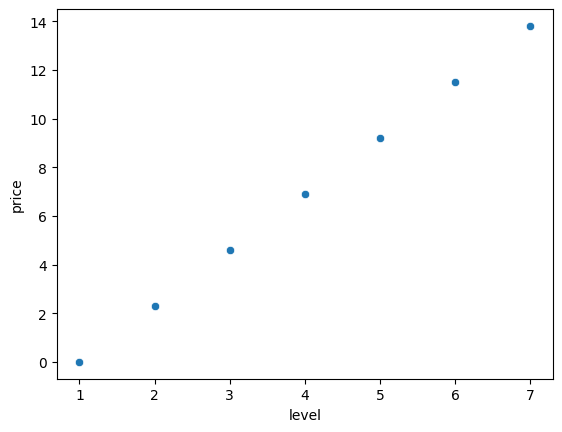

In [40]:
# log를 적용해서 선형적으로 보이도록..
sns.scatterplot(x = price_df['level'], y = np.log(price_df['price']), data = price_df)

In [41]:
np.log(100)
np.exp(4.605170185988092)

np.float64(100.00000000000004)

In [95]:
one_hot_encoding_salary_data = pd.get_dummies(salary_df, columns = ['Gender'], dtype=int)
one_hot_encoding_salary_data

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Gender_Female,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,0,1
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,1,0
2,45.0,3,Manager,15.0,150000,Canada,White,1,0,1
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,1,0
4,52.0,2,Director,20.0,200000,USA,Asian,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,1,0
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,0,1
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,1,0
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,0,1


In [96]:
# drop first로 컬럼을 줄여도 다른 컬럼들의 데이터를 인코딩 했을 때 데이터가 너무 다양하기 때문에 컬럼 수가 147개 까지 나타나게 됨
one_hot_encoding_salary_data = pd.get_dummies(salary_df, columns = ['Gender', 'Country', 'Race', 'Job Title'], drop_first = True)
one_hot_encoding_salary_data

,Age,Education Level,Years of Experience,Salary,Senior,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,...,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Designer,Job Title_Web Developer
0,32.0,1,5.0,90000,0,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,2,3.0,65000,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,52.0,2,20.0,200000,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,20.0,200000,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6680,32.0,0,3.0,50000,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6681,30.0,1,4.0,55000,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6682,46.0,2,14.0,140000,0,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# unique는 한가지 컬럼의 세부 값들을 찾아낼 수 있음
salary_df['Gender'].unique()
# nunique는 리스트의 컬럼 세부 값들의 개수를 알 수 있음
salary_df[['Gender', 'Country', 'Race', 'Job Title']].nunique()

Gender         2
Country        5
Race          10
Job Title    129
dtype: int64

In [76]:
# 리스트를 새롭게 mapping 하면서 모든 세부 값들을 전부 가져와서 보기
unique_values = salary_df[['Gender', 'Country', 'Race', 'Job Title']].apply(lambda x: x.unique())
unique_values

Gender                                          [Male, Female]
Country                    [UK, USA, Canada, China, Australia]
Race         [White, Hispanic, Asian, Korean, Chinese, Aust...
Job Title    [Software Engineer, Data Analyst, Manager, Sal...
dtype: object

In [46]:
# 위에서 확인했듯이 Job Title의 데이터가 너무 많아 통일시킬 수 있는 데이터는 통일시켜야 함
salary_df['Job Title'].value_counts()

Job Title
Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64

In [47]:
# 모든 데이터에서 하나만 있는 데이터를 찾아서 전체 데이터에서 의미 없는 데이터 일 경우 공통된 하나의 이름으로 변환이나 삭제 가능한지 확인
salary_df['Job Title'].value_counts().tail(60)
# 대략 53개가 6000개가 넘는 데이터 중 직업 이름이 하나 밖에 존재하지 않는다.

Job Title
Director of Finance                 2
Manager                             2
Engineer                            2
Administrative Assistant            2
Copywriter                          2
Customer Service Manager            2
Event Coordinator                   2
Advertising Coordinator             1
Software Manager                    1
IT Project Manager                  1
Quality Assurance Analyst           1
Director of Sales and Marketing     1
Account Executive                   1
Director of Business Development    1
Human Resources Specialist          1
Director of Human Capital           1
Data Entry Clerk                    1
Social Media Man                    1
VP of Operations                    1
Product Development Manager         1
Software Architect                  1
HR Specialist                       1
Director                            1
Developer                           1
Customer Service Rep                1
IT Support                          1
UX

In [48]:
# 실제로 어떻게 통일시키면 좋을지 일일히 확인하는 작업이 필요함 (노가다라고 생각할 수 있지만.. 맞다 노가다다 하지만 정확한 데이터 분석을 위해서는 필요한 과정이라 생각함)
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Manager', 'Sales Associate',
       'Director', 'Marketing Analyst', 'Product Manager',
       'Sales Manager', 'Marketing Coordinator', 'Scientist',
       'Software Developer', 'HR Manager', 'Financial Analyst',
       'Project Manager', 'Customer Service Rep', 'Operations Manager',
       'Marketing Manager', 'Engineer', 'Data Entry Clerk',
       'Sales Director', 'Business Analyst', 'VP of Operations',
       'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Developer',
       'Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
       'Director of Marketing', 'Help Des

In [97]:
# job title을 통일시키기 위한 job 데이터 병합 후 기존 Job Title 컬럼 제거
salary_df = salary_df.merge(job_data, on = 'Job Title', how = 'left')
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Jobs
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,Software
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,Data Analyst
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,Manager
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,Sales
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,Director
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,Marketing
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,Sales
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,Financial
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,Marketing


In [98]:
salary_df.drop('Job Title', axis=1, inplace=True)


In [51]:
salary_df.head(10)

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,Director
5,29.0,Male,1,2.0,55000,USA,Hispanic,0,Marketing
6,42.0,Female,2,12.0,120000,USA,Asian,0,Product Manager
7,31.0,Male,1,4.0,80000,China,Korean,0,Sales
8,26.0,Female,1,1.0,45000,China,Chinese,0,Marketing
9,38.0,Male,3,10.0,110000,Australia,Australian,1,Scientist


In [99]:
# 기존에 129개 에서 60개로 확 줄여짐..
salary_df[['Jobs']].nunique()

Jobs    60
dtype: int64

In [ ]:
salary_df = pd.get_dummies(salary_df, columns=['Gender', 'Country', 'Race', 'Jobs' ])
# 기존에 147개 컬럼에서 82개로 확 줄여짐..
salary_df

In [100]:
salary_df = pd.get_dummies(salary_df, columns=['Gender', 'Country', 'Race', 'Jobs'], drop_first=True)
# drop_first 하면 더 줄여짐, 78개 까지 줄여짐.. (더 줄이면 좋다.)
salary_df

,Age,Education Level,Years of Experience,Salary,Senior,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,28.0,2,3.0,65000,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,52.0,2,20.0,200000,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,20.0,200000,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6680,32.0,0,3.0,50000,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6681,30.0,1,4.0,55000,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6682,46.0,2,14.0,140000,0,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
